# Introduction

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk. Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it. At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

### Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORTING CSV FILES
application_record = pd.read_csv("application_record.csv")
credit_record = pd.read_csv("credit_record.csv")

In [3]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
# CHECKING THE SIZE OF BOTH DATASET
application_record.shape, credit_record.shape

((438557, 18), (1048575, 3))

In [6]:
# CHECKING THE NULL VALUES IN application_record 
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [9]:
# CHECKING THE NULL VALUES IN CREDIT_RECORD
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [10]:
# CHECKING FOR DUPLICATE RECORDS IN application_record dataset
application_record[application_record.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


In [11]:
# CHECKING THE GENDER PROPERTION IN application_record
Gender_percent = application_record.CODE_GENDER.value_counts(normalize=True)
Gender_percent

F    0.671384
M    0.328616
Name: CODE_GENDER, dtype: float64

<AxesSubplot:ylabel='CODE_GENDER'>

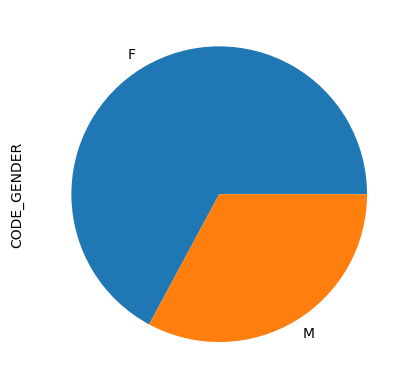

In [12]:
# CHECKING GENDER PERCENT WITH THE HELP OF PIE CHART
Gender_percent.plot.pie()

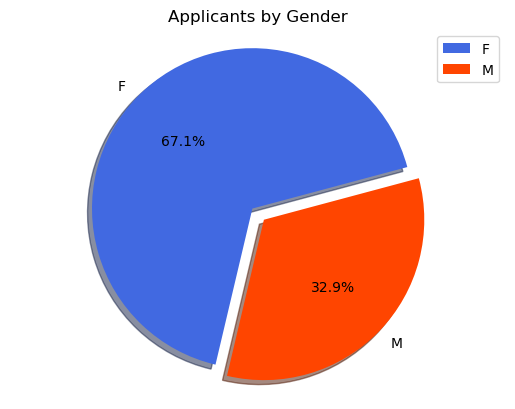

In [13]:
# labelling the pie chart with percent on it
my_labels = 'F','M'
my_colors = ['royalblue','orangered']
my_explode = (0, 0.1)
plt.pie(Gender_percent, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Applicants by Gender')
plt.axis('equal')
plt.ylabel('')
plt.legend(labels=Gender_percent.index, loc="best")

In [14]:
# Checking housing var in different 
housing_value = application_record.NAME_HOUSING_TYPE.value_counts(normalize=True)
housing_value

House / apartment      0.898016
With parents           0.043499
Municipal apartment    0.032411
Rented apartment       0.013622
Office apartment       0.008943
Co-op apartment        0.003509
Name: NAME_HOUSING_TYPE, dtype: float64

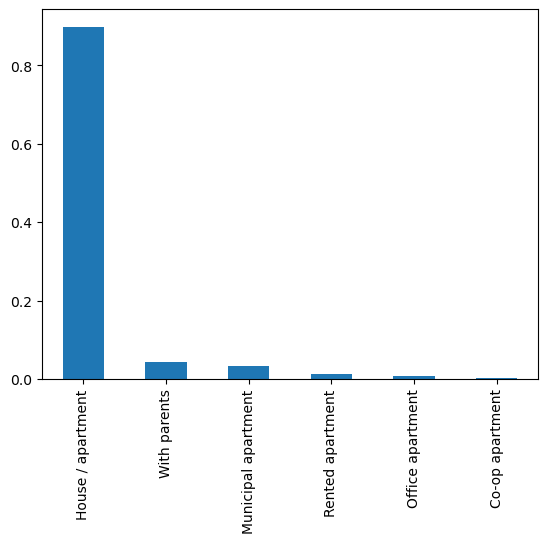

In [15]:
# Understanding with bar graph
housing_value.plot.bar()
plt.show()

Text(0.5, 1.0, 'Applicant by Name of Housing Type')

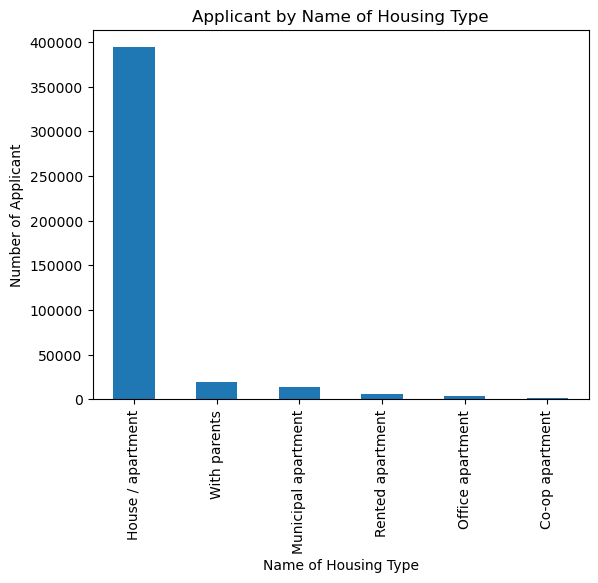

In [16]:
# understanding housing type upon number of applicant
application_record['NAME_HOUSING_TYPE'].value_counts().plot(kind='bar')
plt.xlabel("Name of Housing Type")
plt.ylabel("Number of Applicant")
plt.title("Applicant by Name of Housing Type")

In [17]:
# Checking house ownership on id column
housing_ownership_count = application_record.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID': 'count'})
housing_ownership_count

ID
CODE_GENDER NAME_HOUSING_TYPE          
F           Co-op apartment         862
            House / apartment    267607
            Municipal apartment   10019
            Office apartment       2122
            Rented apartment       3284
            With parents          10546
M           Co-op apartment         677
            House / apartment    126224
            Municipal apartment    4195
            Office apartment       1800
            Rented apartment       2690
            With parents           8531

In [18]:
# Finding housing ownership count on percentage form in column "ID"
housing_ownership_percent = housing_ownership_count.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
housing_ownership_percent

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.292759
            House / apartment    90.886768
            Municipal apartment   3.402731
            Office apartment      0.720690
            Rented apartment      1.115338
            With parents          3.581714
M           Co-op apartment       0.469757
            House / apartment    87.584393
            Municipal apartment   2.910829
            Office apartment      1.248985
            Rented apartment      1.866539
            With parents          5.919496

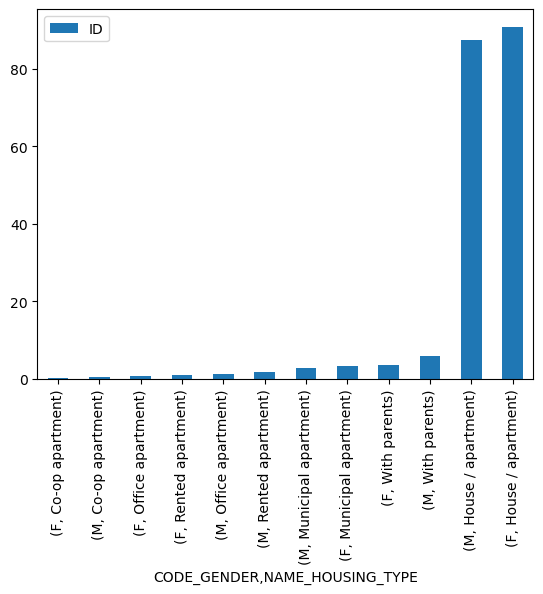

In [19]:
# Understanding housing ownership on bar plot
housing_ownership_percent.sort_values(by="ID").plot.bar()
plt.show()

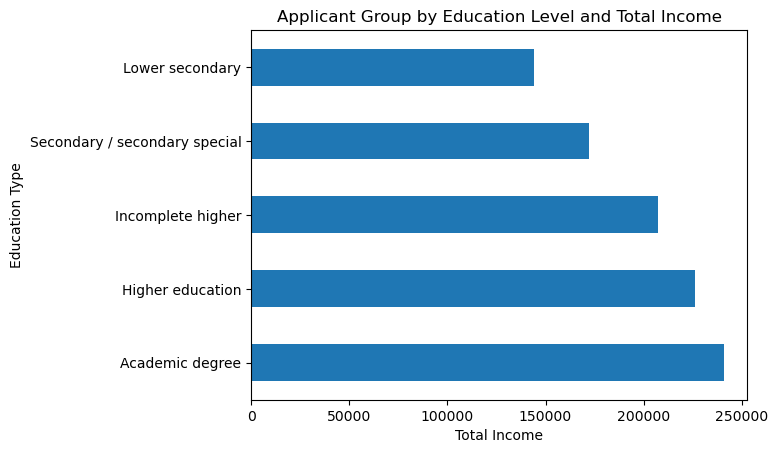

In [20]:
# understanding income level and education level with help of bar plot
application_record.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.xlabel("Total Income")
plt.ylabel("Education Type")
plt.title("Applicant Group by Education Level and Total Income")
plt.show()

In [21]:
# CHECKING THE Mean & Median of amount of total income 
print(round(application_record.AMT_INCOME_TOTAL.mean(),2))
print(round(application_record.AMT_INCOME_TOTAL.median(),2))

187524.29
160780.5


In [22]:
# CHECKING THE CREDIT RECORD INFO 
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [23]:
# checking the summary of credit record
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


Text(0.5, 1.0, 'Overdue of the payement status')

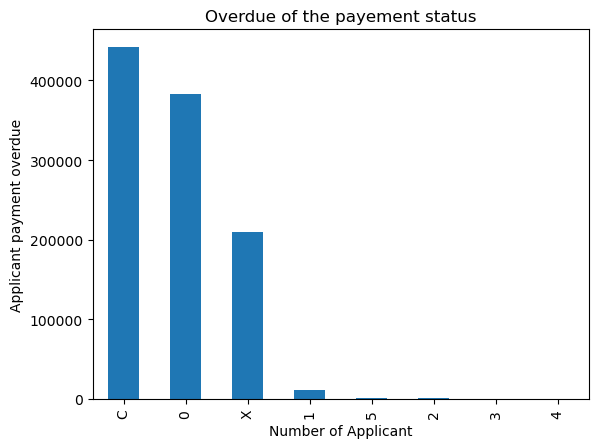

In [24]:
# Checking the payment status  of applicant 
credit_record.STATUS.value_counts().plot.bar()
plt.xlabel("Number of Applicant")
plt.ylabel("Applicant payment overdue")
plt.title("Overdue of the payement status")

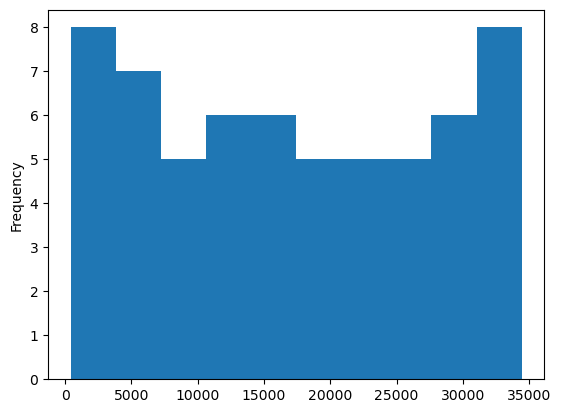

In [25]:
# Checking the credit hidtory on monthly basis
credit_record.MONTHS_BALANCE.value_counts().plot.hist()
plt.show()

In [26]:
# Understanding for how long each customer has had a card
credit_record["MONTHS_BALANCE"] = credit_record.MONTHS_BALANCE.apply(lambda x : x*(-1))
cardholder_tenure = pd.DataFrame(credit_record.groupby("ID").agg({"MONTHS_BALANCE" : max}))
cardholder_tenure.rename(columns = {"MONTHS_BALANCE":"CUSTOMER_FOR_MONTHS"},inplace = True)
cardholder_tenure.head()

,CUSTOMER_FOR_MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


In [27]:
# Merging application_records & cardholder_tenure to get the number of months for which the customer has had a card
customer_data = pd.merge(application_record,cardholder_tenure,how="inner",on="ID")
customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26


In [28]:
# checking the size of customer_data
customer_data.shape

(36457, 19)

In [29]:
# Assigning the encoding value to status column 
credit_record["STATUS"][credit_record["STATUS"] == "C"] = -1
credit_record["STATUS"][credit_record["STATUS"] == "X"] = -1
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


In [30]:
credit_record["STATUS"]= credit_record.STATUS.apply(lambda x:int(x))

In [31]:
credit_record.sort_values(by = 'STATUS',ascending = False,inplace = True)
credit_record.drop_duplicates(subset=["ID"],inplace=True)
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
372050,5042064,42,5
307952,5029028,4,5
723708,5097065,13,5
942335,5135344,16,5
832456,5117313,37,5


In [32]:
credit_record.shape

(45985, 3)

In [33]:
# Assuming that a person is consider  bad customer to bank if he has a payment withstanding for more than 60 days
# So all the customers having STATUS >= 2 will be considered as bad customers
credit_record["target"]=credit_record.STATUS.apply(lambda x:0 if x>2 else 1)
credit_record.drop(["STATUS","MONTHS_BALANCE"],axis=1,inplace=True)
credit_record.head()

,ID,target
372050,5042064,0
307952,5029028,0
723708,5097065,0
942335,5135344,0
832456,5117313,0


In [34]:
# Checking how many good or bad customer have
credit_record.target.value_counts()

1    45654
0      331
Name: target, dtype: int64

In [35]:
# Merging Credit & Application Data to get final dataframe with all the columns
customer_data = pd.merge(customer_data, credit_record, on = "ID", how = "inner")
customer_data.shape

(36457, 20)

In [36]:
customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [37]:
customer_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'CUSTOMER_FOR_MONTHS', 'target'],
      dtype='object')

In [38]:
customer_data.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUSTOMER_FOR_MONTHS',
       'target'],inplace = True)
customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [39]:
# Checking the size of customer_data after removing duplicate values
customer_data.shape

(32146, 20)

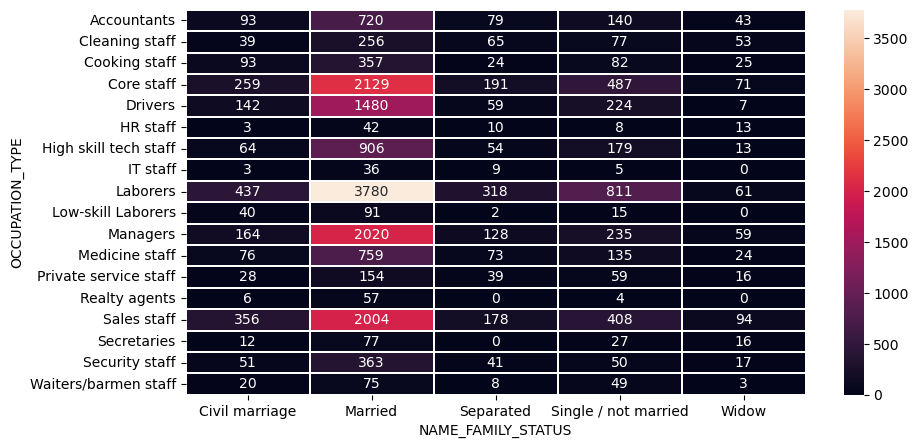

In [40]:
# CREATING A PIVOT TABLE
pivot_tab1 = pd.pivot_table(data=customer_data,index=["OCCUPATION_TYPE"],columns=["NAME_FAMILY_STATUS"],values="target", aggfunc=sum,fill_value=0)
plt.figure(figsize=[10,5])
heat_map= sns.heatmap(data=pivot_tab1,annot = True,fmt='.0f', linewidths=.2)
plt.show()

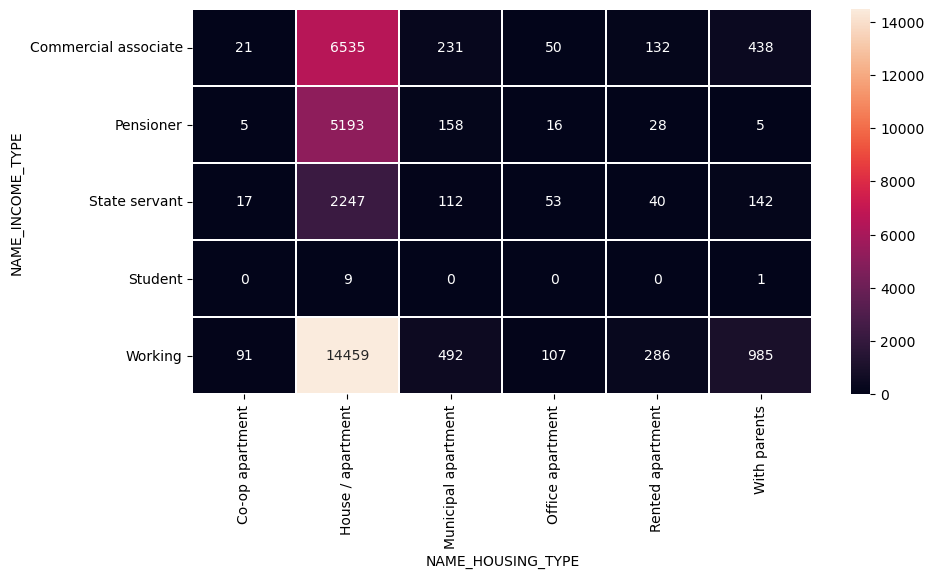

In [41]:
# Creating a second pivot table to understand type of house according to different customer service income
pivot_tab1=pd.pivot_table(data=customer_data,index=["NAME_INCOME_TYPE"],columns=["NAME_HOUSING_TYPE"],values="target",aggfunc=sum,fill_value=0)
plt.figure(figsize=[10,5])
heat_map=sns.heatmap(data=pivot_tab1, annot = True,fmt='.0f', linewidths=.2)
plt.show()

In [42]:
# Checking the null values and details info in customer data
customer_data.info(),  customer_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32146 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   32146 non-null  int64  
 1   CODE_GENDER          32146 non-null  object 
 2   FLAG_OWN_CAR         32146 non-null  object 
 3   FLAG_OWN_REALTY      32146 non-null  object 
 4   CNT_CHILDREN         32146 non-null  int64  
 5   AMT_INCOME_TOTAL     32146 non-null  float64
 6   NAME_INCOME_TYPE     32146 non-null  object 
 7   NAME_EDUCATION_TYPE  32146 non-null  object 
 8   NAME_FAMILY_STATUS   32146 non-null  object 
 9   NAME_HOUSING_TYPE    32146 non-null  object 
 10  DAYS_BIRTH           32146 non-null  int64  
 11  DAYS_EMPLOYED        32146 non-null  int64  
 12  FLAG_MOBIL           32146 non-null  int64  
 13  FLAG_WORK_PHONE      32146 non-null  int64  
 14  FLAG_PHONE           32146 non-null  int64  
 15  FLAG_EMAIL           32146 non-null 

(None,
 ID                        0
 CODE_GENDER               0
 FLAG_OWN_CAR              0
 FLAG_OWN_REALTY           0
 CNT_CHILDREN              0
 AMT_INCOME_TOTAL          0
 NAME_INCOME_TYPE          0
 NAME_EDUCATION_TYPE       0
 NAME_FAMILY_STATUS        0
 NAME_HOUSING_TYPE         0
 DAYS_BIRTH                0
 DAYS_EMPLOYED             0
 FLAG_MOBIL                0
 FLAG_WORK_PHONE           0
 FLAG_PHONE                0
 FLAG_EMAIL                0
 OCCUPATION_TYPE        9969
 CNT_FAM_MEMBERS           0
 CUSTOMER_FOR_MONTHS       0
 target                    0
 dtype: int64)

In [43]:
# converting categorical values to interger values in customer_data
customer_data["CODE_GENDER"]=customer_data.CODE_GENDER.apply(lambda x:0 if x=="M" else 1)
customer_data["FLAG_OWN_CAR"]=customer_data.FLAG_OWN_CAR.apply(lambda x:0 if x=="N" else 1)
customer_data["FLAG_OWN_REALTY"]=customer_data.FLAG_OWN_REALTY.apply(lambda x:0 if x=="N" else 1)
customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [44]:
# Checkng the min ,max and count of customer_data
customer_data.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
count,3.214600e+04,32146.000000,32146.000000,32146.000000,32146.000000,3.214600e+04,32146.000000,32146.000000,32146.0,32146.000000,32146.000000,32146.000000,32146.000000,32146.000000,32146.000000
mean,5.078186e+06,0.669415,0.378772,0.671250,0.431251,1.858567e+05,-15977.800317,59821.470976,1.0,0.225316,0.295247,0.089965,2.199341,26.061563,0.990885
std,4.181192e+04,0.470431,0.485089,0.469766,0.745653,1.007514e+05,4214.201374,138139.461155,0.0,0.417797,0.456161,0.286135,0.914388,16.462280,0.095036
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.041916e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,-19461.000000,-3141.000000,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000
50%,5.074712e+06,1.000000,0.000000,1.000000,0.000000,1.575000e+05,-15567.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,1.000000
75%,5.114631e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,-12454.000000,-401.000000,1.0,0.000000,1.000000,0.000000,3.000000,39.000000,1.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,1.000000


In [45]:
# Checking the variables of FLAG_MOBIL
customer_data.FLAG_MOBIL.value_counts()

1    32146
Name: FLAG_MOBIL, dtype: int64

Since this column have no variation needed as it can easily accept any model so it can be droped

In [46]:
customer_data.drop("FLAG_MOBIL",axis=1,inplace=True)
customer_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUSTOMER_FOR_MONTHS', 'target'],
      dtype='object')

In [47]:
# CNT_FAM_MEMBERS can't be float so converting to integer
customer_data["CNT_FAM_MEMBERS"]=customer_data["CNT_FAM_MEMBERS"].astype("int")
customer_data["CNT_FAM_MEMBERS"]

0        2
1        2
2        2
3        1
4        1
        ..
36451    2
36452    2
36453    2
36454    2
36456    1
Name: CNT_FAM_MEMBERS, Length: 32146, dtype: int32

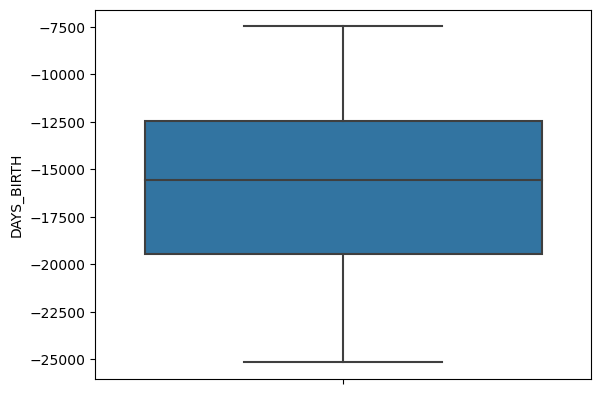

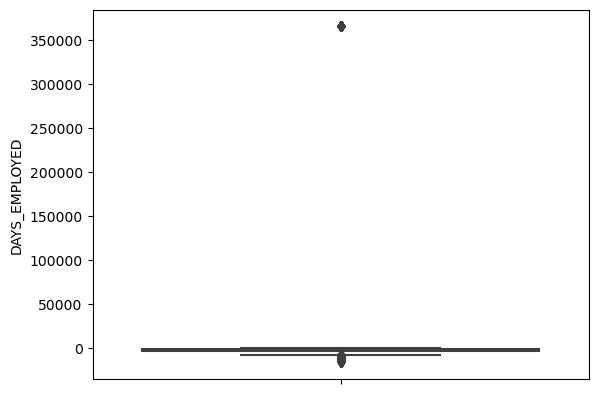

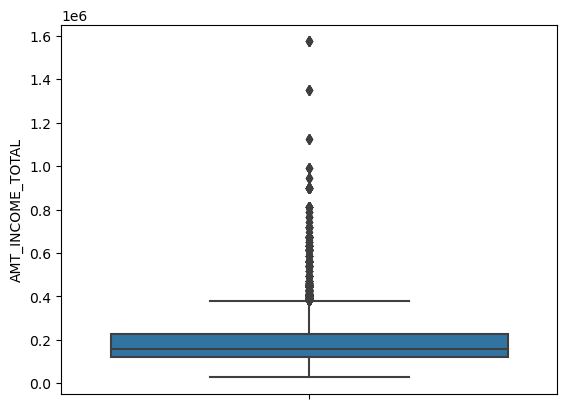

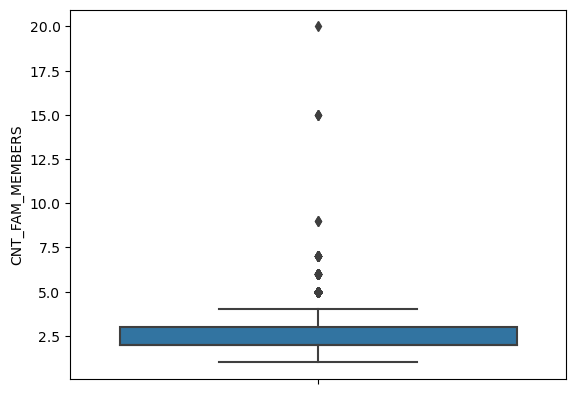

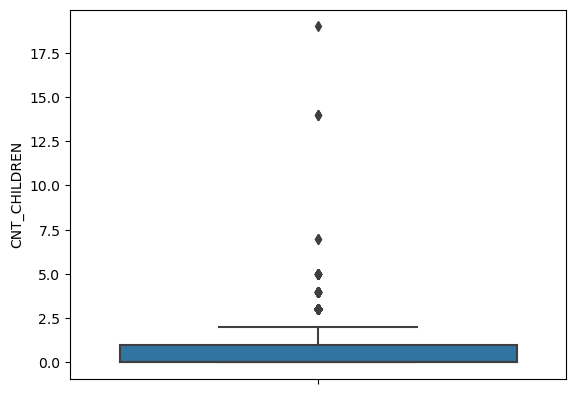

In [48]:
# Understanding box plot
def box_plot(df,col) :
    sns.boxplot(data = df, y = col)
    plt.show()
    
boxplot_colm = ["DAYS_BIRTH","DAYS_EMPLOYED","AMT_INCOME_TOTAL","CNT_FAM_MEMBERS","CNT_CHILDREN"]
for col in boxplot_colm :
    box_plot(customer_data,col)    

In [49]:
#Checking outliers for DAYS_EMPLOYED column
customer_data[customer_data['DAYS_EMPLOYED'] > 0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
7,5008812,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,20,1
8,5008813,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,16,1
9,5008814,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,17,1
69,5008884,1,0,1,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20186,365243,0,0,0,NaN,1,40,1
150,5008974,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36408,5126278,1,0,0,0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21244,365243,0,0,0,NaN,2,28,0
36418,5139446,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21256,365243,0,1,0,NaN,1,16,1
36432,5145690,1,0,1,0,306000.0,Pensioner,Higher education,Married,House / apartment,-21590,365243,0,0,0,NaN,2,17,0
36434,5145817,1,0,1,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22011,365243,0,0,0,NaN,2,39,0


In [50]:
# All the customers with a positive 'DAYS_EMPLOYED' are pensioners and represent a valid data.
#Converting Integer columns to positive integers
def convert_to_positive(df,column) :
    df[column] = df[column].apply(lambda x : x*-1)
    return df

In [51]:
continuous_variable = ['DAYS_BIRTH','DAYS_EMPLOYED']
for c in continuous_variable :
    customer_data = convert_to_positive(customer_data,c)
customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,NaN,2,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,NaN,2,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,0,0,0,Security staff,2,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,26,1


In [52]:
#Converting DAYS to YEARS
customer_data['EMP_YEARS'] = customer_data.DAYS_EMPLOYED/365
customer_data['AGE'] = customer_data.DAYS_BIRTH/365
customer_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis = 1,inplace = True)
customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,15,1,12.443836,32.890411
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,14,1,12.443836,32.890411
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,1,3.106849,58.832877
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,1,8.358904,52.356164
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,1,8.358904,52.356164


In [53]:
# Replacing all the EMP_YEARS for all pensioners to be -1.
customer_data['EMP_YEARS'] = customer_data.EMP_YEARS.apply(lambda x : -1 if x<0 else x)

In [54]:
def bad_cust_proportion(col) :
    bad_prop_cnt = customer_data.groupby([col,'target']).agg({'ID': 'count'})
    bad_prop_percent = bad_prop_cnt.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    return bad_prop_percent

In [55]:
bad_cust_proportion('FLAG_OWN_CAR')

ID
FLAG_OWN_CAR target           
0            0        0.951427
             1       99.048573
1            0        0.845926
             1       99.154074

Proportion of bad customers for people who own a car is less than those who don't own a car

In [56]:
bad_cust_proportion('NAME_HOUSING_TYPE')

ID
NAME_HOUSING_TYPE   target           
Co-op apartment     0        2.189781
                    1       97.810219
House / apartment   0        0.874747
                    1       99.125253
Municipal apartment 0        2.167488
                    1       97.832512
Office apartment    0        1.739130
                    1       98.260870
Rented apartment    0        1.018330
                    1       98.981670
With parents        0        0.506650
                    1       99.493350

People living on rent don't have the highest proportion of bad customers. 
People having 'Office apartment' have the highest proportion of bad customers.

In [57]:
# checking the popertion on family status
bad_cust_proportion('NAME_FAMILY_STATUS')

ID
NAME_FAMILY_STATUS   target           
Civil marriage       0        0.305694
                     1       99.694306
Married              0        0.865703
                     1       99.134297
Separated            0        1.400862
                     1       98.599138
Single / not married 0        1.175917
                     1       98.824083
Widow                0        1.325479
                     1       98.674521

Single customers have a higher proportion of bad customers as compared to married customers and separated customers

In [58]:
customer_data['OCCUPATION_TYPE'] = customer_data.OCCUPATION_TYPE.apply(lambda x : 'UNEMPLOYED' if pd.isnull(x) else x)
customer_data.OCCUPATION_TYPE.value_counts()

UNEMPLOYED               9969
Laborers                 5454
Core staff               3184
Sales staff              3060
Managers                 2626
Drivers                  1925
High skill tech staff    1229
Accountants              1082
Medicine staff           1073
Cooking staff             586
Security staff            530
Cleaning staff            493
Private service staff     296
Waiters/barmen staff      157
Low-skill Laborers        150
Secretaries               134
HR staff                   76
Realty agents              67
IT staff                   55
Name: OCCUPATION_TYPE, dtype: int64

In [59]:
# Calculating Weight of evidence(woe) and Information Value(iv) for good or bad customers
def calc_woe_iv(col) :
    df = pd.DataFrame(columns = ['values','total','good','bad','event_rate','non_event_rate','per_total_events','per_total_non_events','WOE','IV'])
    df['values'] = customer_data[col].unique()
    df.set_index('values',inplace = True)
    
    values = customer_data[col].unique()
    total_dict = dict(customer_data.groupby(col).size())
    col_target_dict = dict(customer_data.groupby([col,'target']).size())
    target_count = dict(customer_data.groupby(['target']).size())
    
    for value in values :
        df.loc[value]['total'] = total_dict[value]
        if (value,1) in col_target_dict:
            df.loc[value]['good'] = col_target_dict[(value,1)]
        else :
            df.loc[value]['good'] = 0
        
        if (value,0) in col_target_dict:
            df.loc[value]['bad'] = col_target_dict[(value,0)]
        else :
            df.loc[value]['bad'] = 0
            
        if df.loc[value]['bad'] == 0 :
            df = df.drop([value])
        
    df['event_rate'] = df['good']/df['total']
    df['non_event_rate'] = df['bad']/df['total']
    
    df['per_total_events'] = df['good']/target_count[1]
    df['per_total_non_events'] = df['bad']/target_count[0]
    
    df['WOE'] = np.log(df.per_total_events.astype('float64')/df.per_total_non_events.astype('float64'))
    df['IV'] = (df['per_total_events'] - df['per_total_non_events']) * df['WOE']
    
    return df

In [60]:
# Creating a new data frame called iv values
iv_values = pd.DataFrame(columns = ['col_name','iv_value'])

In [61]:
iv_values.head()

,col_name,iv_value


In [62]:
# Assigning the values onto that new data frame iv_values
iv_values['col_name'] = customer_data.columns
iv_values.set_index(['col_name'],inplace = True)
iv_values.drop(['ID','target'],inplace = True)
iv_values

,iv_value
col_name,
CODE_GENDER,NaN
FLAG_OWN_CAR,NaN
FLAG_OWN_REALTY,NaN
CNT_CHILDREN,NaN
AMT_INCOME_TOTAL,NaN
NAME_INCOME_TYPE,NaN
NAME_EDUCATION_TYPE,NaN
NAME_FAMILY_STATUS,NaN
NAME_HOUSING_TYPE,NaN


### Binary Variables 

In [63]:
#  CODE_GENDER
CODE_GENDER_df = calc_woe_iv('CODE_GENDER')
iv_values.loc['CODE_GENDER'] = CODE_GENDER_df.IV.sum()
print(iv_values.loc['CODE_GENDER'])
CODE_GENDER_df

iv_value    0.010376
Name: CODE_GENDER, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,10627,10516,111,0.989555,0.010445,0.330142,0.37884,-0.137591,0.0067
1,21519,21337,182,0.991542,0.008458,0.669858,0.62116,0.075477,0.003676


In [64]:
# FLAG_OWN_CAR
FLAG_OWN_CAR_df = calc_woe_iv('FLAG_OWN_CAR')
iv_values.loc['FLAG_OWN_CAR'] = FLAG_OWN_CAR_df.IV.sum()
print(iv_values.loc['FLAG_OWN_CAR'])
FLAG_OWN_CAR_df

iv_value    0.00326
Name: FLAG_OWN_CAR, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,12176,12073,103,0.991541,0.008459,0.379022,0.351536,0.075284,0.002069
0,19970,19780,190,0.990486,0.009514,0.620978,0.648464,-0.043312,0.00119


In [65]:
# FLAG_OWN_REALTY
FLAG_OWN_REALTY_df = calc_woe_iv('FLAG_OWN_REALTY')
iv_values.loc['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_df.IV.sum()
print(iv_values.loc['FLAG_OWN_REALTY'])
FLAG_OWN_REALTY_df

iv_value    0.031078
Name: FLAG_OWN_REALTY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,21578,21406,172,0.992029,0.007971,0.672025,0.587031,0.135218,0.011493
0,10568,10447,121,0.98855,0.01145,0.327975,0.412969,-0.230435,0.019586


In [66]:
# FLAG_WORK_PHONE
FLAG_WORK_PHONE_df = calc_woe_iv('FLAG_WORK_PHONE')
iv_values.loc['FLAG_WORK_PHONE'] = FLAG_WORK_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_WORK_PHONE'])
FLAG_WORK_PHONE_df

iv_value    0.001056
Name: FLAG_WORK_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,7243,7173,70,0.990335,0.009665,0.225191,0.238908,-0.059130,0.000811
0,24903,24680,223,0.991045,0.008955,0.774809,0.761092,0.017862,0.000245


In [67]:
# FLAG_OWN_REALTY
FLAG_OWN_REALTY_df = calc_woe_iv('FLAG_OWN_REALTY')
iv_values.loc['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_df.IV.sum()
print(iv_values.loc['FLAG_OWN_REALTY'])
FLAG_OWN_REALTY_df

iv_value    0.031078
Name: FLAG_OWN_REALTY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,21578,21406,172,0.992029,0.007971,0.672025,0.587031,0.135218,0.011493
0,10568,10447,121,0.98855,0.01145,0.327975,0.412969,-0.230435,0.019586


In [68]:
#  FLAG_PHONE
FLAG_PHONE_df = calc_woe_iv('FLAG_PHONE')
iv_values.loc['FLAG_PHONE'] = FLAG_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_PHONE'])
FLAG_PHONE_df

iv_value    0.007273
Name: FLAG_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22655,22460,195,0.991393,0.008607,0.705114,0.665529,0.057777,0.002287
1,9491,9393,98,0.989674,0.010326,0.294886,0.334471,-0.125962,0.004986


In [69]:
# FLAG_EMAIL
FLAG_EMAIL_df = calc_woe_iv('FLAG_EMAIL')
iv_values.loc['FLAG_EMAIL'] = FLAG_EMAIL_df.IV.sum()
print(iv_values.loc['FLAG_EMAIL'])
FLAG_EMAIL_df

iv_value    0.000968
Name: FLAG_EMAIL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,29254,28990,264,0.990976,0.009024,0.910118,0.901024,0.010043,0.000091
1,2892,2863,29,0.989972,0.010028,0.089882,0.098976,-0.096385,0.000877


### Categorical variables 

In [70]:
# NAME_INCOME_TYPE
NAME_INCOME_TYPE_df = calc_woe_iv('NAME_INCOME_TYPE')
iv_values.loc['NAME_INCOME_TYPE'] = NAME_INCOME_TYPE_df.IV.sum()
print(iv_values.loc['NAME_INCOME_TYPE'])
NAME_INCOME_TYPE_df

iv_value    0.052403
Name: NAME_INCOME_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Working,16544,16420,124,0.992505,0.007495,0.515493,0.423208,0.197260,0.018204
Commercial associate,7487,7407,80,0.989315,0.010685,0.232537,0.273038,-0.160560,0.006503
Pensioner,5475,5405,70,0.987215,0.012785,0.169686,0.238908,-0.342130,0.023683
State servant,2630,2611,19,0.992776,0.007224,0.08197,0.064846,0.234335,0.004013


In [71]:
# NAME_EDUCATION_TYPE
NAME_EDUCATION_TYPE_df = calc_woe_iv('NAME_EDUCATION_TYPE')
iv_values.loc['NAME_EDUCATION_TYPE'] = NAME_EDUCATION_TYPE_df.IV.sum()
print(iv_values.loc['NAME_EDUCATION_TYPE'])
NAME_EDUCATION_TYPE_df

iv_value    0.032252
Name: NAME_EDUCATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Higher education,8663,8575,88,0.989842,0.010158,0.269205,0.300341,-0.109445,0.003408
Secondary / secondary special,21873,21693,180,0.991771,0.008229,0.681035,0.614334,0.103074,0.006875
Incomplete higher,1250,1232,18,0.9856,0.0144,0.038678,0.061433,-0.462692,0.010529
Lower secondary,335,328,7,0.979104,0.020896,0.010297,0.023891,-0.841611,0.01144


In [72]:
# NAME_FAMILY_STATUS
NAME_FAMILY_STATUS_df = calc_woe_iv('NAME_FAMILY_STATUS')
iv_values.loc['NAME_FAMILY_STATUS'] = NAME_FAMILY_STATUS_df.IV.sum()
print(iv_values.loc['NAME_FAMILY_STATUS'])
NAME_FAMILY_STATUS_df

iv_value    0.092697
Name: NAME_FAMILY_STATUS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Civil marriage,2617,2609,8,0.996943,0.003057,0.081908,0.027304,1.098567,0.059986
Married,22063,21872,191,0.991343,0.008657,0.686654,0.651877,0.051975,0.001808
Single / not married,4252,4202,50,0.988241,0.011759,0.131919,0.170648,-0.257421,0.00997
Separated,1856,1830,26,0.985991,0.014009,0.057451,0.088737,-0.434740,0.013601
Widow,1358,1340,18,0.986745,0.013255,0.042068,0.061433,-0.378661,0.007333


In [73]:
# NAME_HOUSING_TYPE
NAME_HOUSING_TYPE_df = calc_woe_iv('NAME_HOUSING_TYPE')
iv_values.loc['NAME_HOUSING_TYPE'] = NAME_HOUSING_TYPE_df.IV.sum()
print(iv_values.loc['NAME_HOUSING_TYPE'])
NAME_HOUSING_TYPE_df

iv_value    0.062982
Name: NAME_HOUSING_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Rented apartment,491,486,5,0.989817,0.010183,0.015258,0.017065,-0.111944,0.000202
House / apartment,28694,28443,251,0.991253,0.008747,0.892946,0.856655,0.041490,0.001506
Municipal apartment,1015,993,22,0.978325,0.021675,0.031174,0.075085,-0.879026,0.038599
With parents,1579,1571,8,0.994934,0.005066,0.04932,0.027304,0.591312,0.013019
Co-op apartment,137,134,3,0.978102,0.021898,0.004207,0.010239,-0.889487,0.005365
Office apartment,230,226,4,0.982609,0.017391,0.007095,0.013652,-0.654474,0.004291


In [74]:
# OCCUPATION_TYPE
OCCUPATION_TYPE_df = calc_woe_iv('OCCUPATION_TYPE')
iv_values.loc['OCCUPATION_TYPE'] = OCCUPATION_TYPE_df.IV.sum()
print(iv_values.loc['OCCUPATION_TYPE'])
OCCUPATION_TYPE_df

iv_value    0.076632
Name: OCCUPATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
UNEMPLOYED,9969,9873,96,0.99037,0.00963,0.309955,0.327645,-0.055503,0.000982
Security staff,530,522,8,0.984906,0.015094,0.016388,0.027304,-0.510488,0.005572
Sales staff,3060,3040,20,0.993464,0.006536,0.095438,0.068259,0.335166,0.009109
Accountants,1082,1075,7,0.99353,0.00647,0.033749,0.023891,0.345452,0.003405
Laborers,5454,5407,47,0.991382,0.008618,0.169749,0.16041,0.056588,0.000528
Managers,2626,2606,20,0.992384,0.007616,0.081813,0.068259,0.181125,0.002455
Drivers,1925,1912,13,0.993247,0.006753,0.060026,0.044369,0.302241,0.004732
Core staff,3184,3137,47,0.985239,0.014761,0.098484,0.16041,-0.487840,0.03021
High skill tech staff,1229,1216,13,0.989422,0.010578,0.038175,0.044369,-0.150342,0.000931


### Continuous variable 

In [75]:
customer_data.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE
count,3.214600e+04,32146.000000,32146.000000,32146.000000,32146.000000,3.214600e+04,32146.000000,32146.000000,32146.000000,32146.000000,32146.000000,32146.000000,32146.000000,32146.000000
mean,5.078186e+06,0.669415,0.378772,0.671250,0.431251,1.858567e+05,0.225316,0.295247,0.089965,2.199341,26.061563,0.990885,5.836651,43.774795
std,4.181192e+04,0.470431,0.485089,0.469766,0.745653,1.007514e+05,0.417797,0.456161,0.286135,0.914388,16.462280,0.095036,6.652358,11.545757
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,20.517808
25%,5.041916e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000,1.098630,34.120548
50%,5.074712e+06,1.000000,0.000000,1.000000,0.000000,1.575000e+05,0.000000,0.000000,0.000000,2.000000,24.000000,1.000000,4.216438,42.649315
75%,5.114631e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,0.000000,1.000000,0.000000,3.000000,39.000000,1.000000,8.605479,53.317808
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,60.000000,1.000000,43.049315,68.909589


In [76]:
# CNT_CHILDREN
# Since all the bins should have atleast 5% of the total observations, therefore dividing 'CNT_CHILDREN' into [0,1,1+] bins
customer_data['cnt_child_category'] = customer_data.CNT_CHILDREN.apply(lambda x : '1+' if x>= 2 else str(x))

In [77]:
CNT_CHILDREN_df = calc_woe_iv('cnt_child_category')
iv_values.loc['CNT_CHILDREN'] = CNT_CHILDREN_df.IV.sum()
print(iv_values.loc['CNT_CHILDREN'])
CNT_CHILDREN_df

iv_value    0.004839
Name: CNT_CHILDREN, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,22214,22004,210,0.990547,0.009453,0.690798,0.716724,-0.036842,0.000955
1,6602,6544,58,0.991215,0.008785,0.205444,0.197952,0.037147,0.000278
1+,3330,3305,25,0.992492,0.007508,0.103758,0.085324,0.195602,0.003606


In [78]:
# AMT_INCOME_TOTAL
# separating into different bins
bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 1600000]
labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '1600000']
customer_data['income_bin'] = pd.cut(customer_data['AMT_INCOME_TOTAL'], bins = bins, labels = labels)
customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,UNEMPLOYED,2,15,1,12.443836,32.890411,0,1600000
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,UNEMPLOYED,2,14,1,12.443836,32.890411,0,1600000
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Security staff,2,29,1,3.106849,58.832877,0,150000
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,4,1,8.358904,52.356164,0,300000
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,Sales staff,1,26,1,8.358904,52.356164,0,300000


In [79]:
customer_data.income_bin.value_counts()

150000     9047
200000     6825
250000     6013
100000     3111
300000     2405
1600000    2028
70000      1411
350000     1306
Name: income_bin, dtype: int64

In [80]:
AMT_INCOME_TOTAL_df = calc_woe_iv('income_bin')
iv_values.loc['AMT_INCOME_TOTAL'] = AMT_INCOME_TOTAL_df.IV.sum()
print(iv_values.loc['AMT_INCOME_TOTAL'])
AMT_INCOME_TOTAL_df.sort_values(by = 'WOE',inplace = True)
AMT_INCOME_TOTAL_df

iv_value    0.030632
Name: AMT_INCOME_TOTAL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
350000,1306,1288,18,0.986217,0.013783,0.040436,0.061433,-0.418240,0.008782
1600000,2028,2005,23,0.988659,0.011341,0.062945,0.078498,-0.220809,0.003434
250000,6013,5952,61,0.989855,0.010145,0.186858,0.208191,-0.108106,0.002306
100000,3111,3081,30,0.990357,0.009643,0.096726,0.102389,-0.056902,0.000322
70000,1411,1398,13,0.990787,0.009213,0.043889,0.044369,-0.010866,0.000005
200000,6825,6765,60,0.991209,0.008791,0.212382,0.204778,0.036459,0.000277
150000,9047,8973,74,0.99182,0.00818,0.2817,0.25256,0.109196,0.003182
300000,2405,2391,14,0.994179,0.005821,0.075064,0.047782,0.451695,0.012323


In [81]:
# CNT_FAM_MEMBERS
customer_data.CNT_FAM_MEMBERS.value_counts()

2     17153
1      6162
3      5658
4      2744
5       356
6        50
7        17
15        3
9         2
20        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [82]:
customer_data['cnt_family_bin'] = customer_data.CNT_FAM_MEMBERS.apply(lambda x : '3+' if x>= 4 else str(x))

In [83]:
CNT_FAM_MEMBERS_df = calc_woe_iv('cnt_family_bin')
iv_values.loc['CNT_FAM_MEMBERS'] = CNT_FAM_MEMBERS_df.IV.sum()
print(iv_values.loc['CNT_FAM_MEMBERS'])
CNT_FAM_MEMBERS_df.sort_values(by = 'WOE',inplace = True)
CNT_FAM_MEMBERS_df

iv_value    0.021303
Name: CNT_FAM_MEMBERS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,6162,6090,72,0.988315,0.011685,0.191191,0.245734,-0.250977,0.013689
2,17153,17000,153,0.99108,0.00892,0.533702,0.522184,0.021816,0.000251
3,5658,5614,44,0.992223,0.007777,0.176247,0.150171,0.160115,0.004175
3+,3173,3149,24,0.992436,0.007564,0.09886,0.081911,0.188072,0.003188


In [84]:
# CUST_FOR_MONTHS
bins = [-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
labels = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
customer_data['months_bin'] = pd.cut(customer_data['CUSTOMER_FOR_MONTHS'], bins = bins,labels = labels)
customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,UNEMPLOYED,2,15,1,12.443836,32.890411,0,1600000,2,1.5
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,UNEMPLOYED,2,14,1,12.443836,32.890411,0,1600000,2,1.5
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,29,1,3.106849,58.832877,0,150000,2,2.5
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,4,1,8.358904,52.356164,0,300000,1,0.5
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,26,1,8.358904,52.356164,0,300000,1,2.5


In [85]:
customer_data.months_bin.value_counts()

1      4274
0.5    4200
1.5    4094
2      3635
2.5    3452
3.5    3077
3      3045
4      2429
4.5    2210
5      1730
Name: months_bin, dtype: int64

In [86]:
CUST_FOR_MONTHS_df = calc_woe_iv('months_bin')
iv_values.loc['CUST_FOR_MONTHS'] = CUST_FOR_MONTHS_df.IV.sum()
print(iv_values.loc['CUST_FOR_MONTHS'])
CUST_FOR_MONTHS_df.sort_values(by = 'WOE',inplace = True)
CUST_FOR_MONTHS_df

iv_value    0.380087
Name: CUST_FOR_MONTHS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
5,1730,1686,44,0.974566,0.025434,0.052931,0.150171,-1.042790,0.101401
4,2429,2395,34,0.986002,0.013998,0.075189,0.116041,-0.433936,0.017727
3.5,3077,3034,43,0.986025,0.013975,0.09525,0.146758,-0.432277,0.022266
4.5,2210,2181,29,0.986878,0.013122,0.068471,0.098976,-0.368471,0.01124
3,3045,3011,34,0.988834,0.011166,0.094528,0.116041,-0.205047,0.004411
1.5,4094,4063,31,0.992428,0.007572,0.127555,0.105802,0.186975,0.004067
2.5,3452,3426,26,0.992468,0.007532,0.107557,0.088737,0.192338,0.00362
2,3635,3612,23,0.993673,0.006327,0.113396,0.078498,0.367808,0.012836
1,4274,4253,21,0.995087,0.004913,0.13352,0.071672,0.622143,0.038478


In [87]:
#  EMP_YEARS
bins = [-2, -1,  5, 10, 15,  20, 50]
labels = ['retired','5','10','15','20','20+']
customer_data['emp_years_bin'] = pd.cut(customer_data['EMP_YEARS'], bins = bins, labels = labels)
customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,15,1,12.443836,32.890411,0,1600000,2,1.5,15
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,14,1,12.443836,32.890411,0,1600000,2,1.5,15
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2,29,1,3.106849,58.832877,0,150000,2,2.5,5
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,4,1,8.358904,52.356164,0,300000,1,0.5,10
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,26,1,8.358904,52.356164,0,300000,1,2.5,10


In [88]:
customer_data.emp_years_bin.value_counts()

5          12585
10          7859
retired     5458
15          3265
20+         1531
20          1448
Name: emp_years_bin, dtype: int64

In [89]:
EMP_YEARS_df = calc_woe_iv('emp_years_bin')
iv_values.loc['EMP_YEARS'] = EMP_YEARS_df.IV.sum()
print(iv_values.loc['EMP_YEARS'])
EMP_YEARS_df.sort_values(by = 'WOE',inplace = True)
EMP_YEARS_df

iv_value    0.083482
Name: EMP_YEARS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
retired,5458,5395,63,0.988457,0.011543,0.169372,0.215017,-0.238621,0.010892
5,12585,12445,140,0.988876,0.011124,0.390701,0.477816,-0.201282,0.017535
20+,1531,1520,11,0.992815,0.007185,0.047719,0.037543,0.239856,0.002441
10,7859,7806,53,0.993256,0.006744,0.245063,0.180887,0.303642,0.019486
15,3265,3245,20,0.993874,0.006126,0.101874,0.068259,0.400424,0.01346
20,1448,1442,6,0.995856,0.004144,0.04527,0.020478,0.793313,0.019668


In [90]:
# AGE
bins = [19, 27, 30, 35, 40, 45, 50, 55, 62, 70]
labels = ['27','30','35','40','45','50','55','62','70']
customer_data['age_bin'] = pd.cut(customer_data['AGE'], bins = bins,labels = labels)
customer_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE,cnt_child_category,income_bin,cnt_family_bin,months_bin,emp_years_bin,age_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,15,1,12.443836,32.890411,0,1600000,2,1.5,15,35
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,14,1,12.443836,32.890411,0,1600000,2,1.5,15,35
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,29,1,3.106849,58.832877,0,150000,2,2.5,5,62
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,4,1,8.358904,52.356164,0,300000,1,0.5,10,55
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,26,1,8.358904,52.356164,0,300000,1,2.5,10,55


In [91]:
customer_data.age_bin.value_counts()

40    4713
62    4619
35    4473
45    4470
50    3685
55    3590
30    2798
70    2213
27    1585
Name: age_bin, dtype: int64

In [92]:
AGE_df = calc_woe_iv('age_bin')
iv_values.loc['AGE'] = AGE_df.IV.sum()
print(iv_values.loc['AGE'])
AGE_df.sort_values(by = 'WOE',inplace = True)
AGE_df

iv_value    0.038632
Name: AGE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
70,2213,2184,29,0.986896,0.013104,0.068565,0.098976,-0.367097,0.011164
27,1585,1567,18,0.988644,0.011356,0.049195,0.061433,-0.222168,0.002719
55,3590,3550,40,0.988858,0.011142,0.111449,0.136519,-0.202891,0.005086
30,2798,2771,27,0.99035,0.00965,0.086993,0.09215,-0.057588,0.000297
50,3685,3650,35,0.990502,0.009498,0.114589,0.119454,-0.041580,0.000202
45,4470,4430,40,0.991051,0.008949,0.139076,0.136519,0.018561,0.000047
62,4619,4579,40,0.99134,0.00866,0.143754,0.136519,0.051642,0.000374
40,4713,4679,34,0.992786,0.007214,0.146894,0.116041,0.235765,0.007274
35,4473,4443,30,0.993293,0.006707,0.139485,0.102389,0.309173,0.011469


In [93]:
iv_values.sort_values(by = 'iv_value',ascending=False,inplace = True)
iv_values

,iv_value
col_name,
CUST_FOR_MONTHS,0.380087
NAME_FAMILY_STATUS,0.092697
EMP_YEARS,0.083482
OCCUPATION_TYPE,0.076632
NAME_HOUSING_TYPE,0.062982
NAME_INCOME_TYPE,0.052403
AGE,0.038632
NAME_EDUCATION_TYPE,0.032252
FLAG_OWN_REALTY,0.031078


In [94]:
customer_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'CUSTOMER_FOR_MONTHS', 'target', 'EMP_YEARS', 'AGE',
       'cnt_child_category', 'income_bin', 'cnt_family_bin', 'months_bin',
       'emp_years_bin', 'age_bin'],
      dtype='object')

In [95]:
credit_record.target.value_counts()

1    45654
0      331
Name: target, dtype: int64

In [96]:
credit_record.count()

ID        45985
target    45985
dtype: int64

### Importing models and applying on it 

In [97]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [100]:
# Data preparation for Model training
customer_data_train = customer_data[[ 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                             'OCCUPATION_TYPE', 'CUSTOMER_FOR_MONTHS', 'cnt_child_category', 'income_bin', 'cnt_family_bin',
                             'months_bin', 'emp_years_bin', 'age_bin', 'target']]

### Creating dummy variables

In [101]:
# Dummy features for categorical values
def creatingDummyVariables(df, columns) :
    # Creating a dummy variable for some of the categorical variables and dropping the first one.
    dummy1 = pd.get_dummies(df[columns], drop_first=True)
    
    # Adding the results to the master dataframe
    df1 = pd.concat([df, dummy1], axis=1)
    
    #Dropping the initial column
    df1.drop(columns, axis = 1, inplace = True)
    
    return df1

In [102]:
customer_data_train = customer_data[['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUSTOMER_FOR_MONTHS', 'EMP_YEARS', 'AGE', 'target']]

In [103]:
customer_data_train = creatingDummyVariables(customer_data_train, ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                            'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

In [105]:
# assigning the training to variables
x = customer_data_train.drop('target',1)
y = customer_data_train['target']

In [106]:
# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [107]:
# Create a Decision Tree
dt_basic = DecisionTreeClassifier(max_depth=10)

In [108]:
# Fit the training data
dt_basic.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [131]:
x_train[:10]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_UNEMPLOYED,OCCUPATION_TYPE_Waiters/barmen staff
28747,5116615,1,1,1,1,157500.0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
34720,5148437,1,0,1,0,202500.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10660,5045807,1,1,0,0,157500.0,1,0,0,2,...,0,0,0,0,0,0,0,0,1,0
336,5009216,1,0,0,0,270000.0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
18851,5078793,0,0,1,0,157500.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4301,5024256,0,0,1,1,121500.0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
35544,5149535,1,0,1,0,130500.0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
11371,5047856,0,1,1,1,292500.0,0,0,0,3,...,0,0,0,0,0,0,0,0,1,0
11321,5047788,1,1,1,0,225000.0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
5284,5026188,0,1,1,0,270000.0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# Checking y_Predict based on test data
y_pred = dt_basic.predict(x_test)

In [118]:
# Calculate Accuracy
accuracy_value = metrics.accuracy_score(y_test,y_pred)
accuracy_value

0.9878681045209456

In [119]:
# Creating  confusion matrix
confusion_matrix(y_test,y_pred)

array([[   4,   83],
       [  34, 9523]], dtype=int64)

In [120]:
# understanding the classification report on ytest and y_pred
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.11      0.05      0.06        87
           1       0.99      1.00      0.99      9557

    accuracy                           0.99      9644
   macro avg       0.55      0.52      0.53      9644
weighted avg       0.98      0.99      0.99      9644



In [121]:
# checking the number of nodes in the tree
dt_basic.tree_.node_count

271

In [122]:
# Hyperparameter tuning for Decision Trees
# Create a Parameter grid
param_grid = {
    'max_depth' : range(5,20,5),
    'min_samples_leaf' : range(50,210,50),
    'min_samples_split' : range(50,210,50),
    'criterion' : ['gini','entropy'] 
}

In [123]:
n_folds = 5

### understanding decission tree

In [124]:
dtree = DecisionTreeClassifier()
grid = GridSearchCV(dtree, param_grid, cv = n_folds, n_jobs = -1,return_train_score=True)

In [125]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 210, 50),
                         'min_samples_split': range(50, 210, 50)},
             return_train_score=True)

In [126]:
cv_result = pd.DataFrame(grid.cv_results_)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.361392,0.030805,0.010135,0.000015,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.990891,...,0.990845,0.000088,1,0.990834,0.990889,0.990834,0.990834,0.990834,0.990845,0.000022
1,0.319575,0.017777,0.017808,0.007502,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.990891,...,0.990845,0.000088,1,0.990834,0.990889,0.990834,0.990834,0.990834,0.990845,0.000022
2,0.317573,0.046208,0.011733,0.003232,gini,5,50,150,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.990891,...,0.990845,0.000088,1,0.990834,0.990889,0.990834,0.990834,0.990834,0.990845,0.000022
3,0.322111,0.021574,0.010587,0.001648,gini,5,50,200,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.990891,...,0.990845,0.000088,1,0.990834,0.990889,0.990834,0.990834,0.990834,0.990845,0.000022
4,0.323679,0.014051,0.012137,0.003124,gini,5,100,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.990891,...,0.990845,0.000088,1,0.990834,0.990889,0.990834,0.990834,0.990834,0.990845,0.000022


In [127]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [128]:
best_grid = grid.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

In [129]:
best_grid.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

In [130]:
best_grid.score(x_test,y_test)

0.9909788469514724